# Analysing US Medical Insurance data
### Portfolio project

#### Step 1: Importing the data (insurance.csv)

In [1]:
import csv
def import_data(file):
    insurance_data = []
    with open(file) as data_file:
        data_reader = csv.DictReader(data_file)
        for row in data_reader:
            insurance_data.append(row)
    # print("Total number of persons in the dataset : {}".format(len(insurance_data)))
    return insurance_data

#### Step 2: Creating separate lists for each of the columns.

In [2]:
file_name = 'D:/Learning/Codeacademy_projects/portfolio-proj-1/data_files/insurance.csv'
# calling the import data function
imported_data = import_data(file_name)
headers_list = list(imported_data[0])
age_list = []
sex_list = []
bmi_list = []
children_list = []
smoker_list = []
region_list = []
charges_list = []

for row in imported_data:
    age_list.append(int(row['age']))
    sex_list.append(row['sex'])
    bmi_list.append(float(row['bmi']))
    children_list.append(int(row['children']))
    smoker_list.append(row['smoker'])
    region_list.append(row['region'])
    charges_list.append(float(row['charges']))

#### Step 3: Analysing the dataset

- Summary stats on categorical variables
    - ###### on Gender, Smoker and Region.

How many patients of each gender?
Total females: 662
  Smokers: 115(17.4%)
Total males: 676
  Smokers: 159(23.5%)


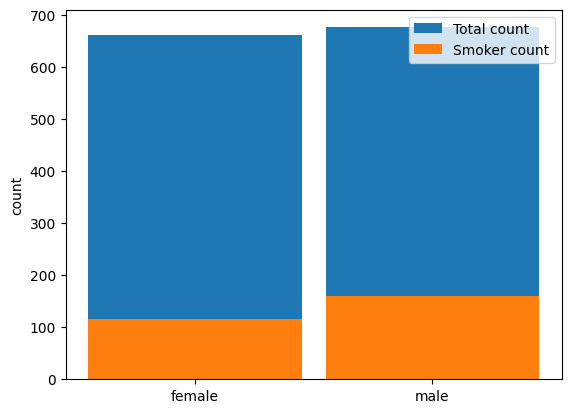

Total smokers: 274

How many patients from each region?
northwest: 325
  Smokers: 58(17.8%)
  Avg. charges: 12417.58
  Avg. bmi: 29.2
southeast: 364
  Smokers: 91(25.0%)
  Avg. charges: 14735.41
  Avg. bmi: 33.36
southwest: 325
  Smokers: 58(17.8%)
  Avg. charges: 12346.94
  Avg. bmi: 30.6
northeast: 324
  Smokers: 67(20.7%)
  Avg. charges: 13406.38
  Avg. bmi: 29.17


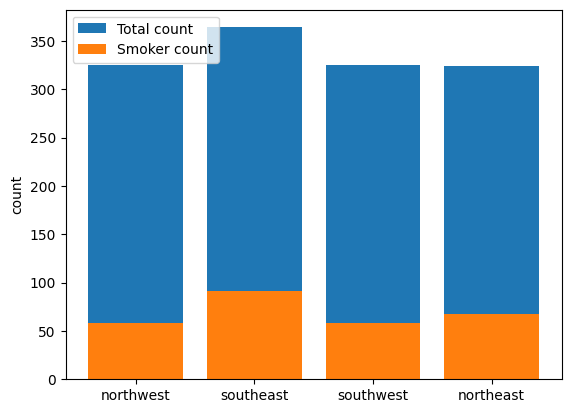

In [3]:
import statistics, matplotlib.pyplot as plt, numpy as np

# Get all unique values in the respective columns.
all_gender = set(sex_list)
all_smoker = set(smoker_list)
all_regions = set(region_list)

print("How many patients of each gender?")
gender_count = []
gender_count_smoker = []
for gender in all_gender:
    print("Total {}s: {}".format(gender, sex_list.count(gender)))
    gender_count.append(sex_list.count(gender))
    sm_count = 0
    for row in imported_data:
        if(row['sex'] == gender and row['smoker'] == 'yes'):
            sm_count += 1
    gender_count_smoker.append(sm_count)
    sm_pct = round(sm_count / sex_list.count(gender) *100,1)
    print("  Smokers: {}({}%)".format(sm_count,sm_pct))

x = np.array(list(all_gender))
y = np.array(gender_count)
plt.bar(x, y, width=0.9)
plt.ylabel("count")

y = np.array(gender_count_smoker)
plt.bar(x, y, width=0.9)

plt.legend(["Total count", "Smoker count"])
plt.show()


# print("\nHow many smokers?")
print("Total smokers: {}".format(smoker_list.count("yes")))

print("\nHow many patients from each region?")
region_count = []
region_count_smoker = []
region_smoker_list = {}
region_non_smoker_list = {}
for region in all_regions:
    print("{}: {}".format(region,region_list.count(region)))
    region_count.append(region_list.count(region))
    region_smoker_list[region] = []
    region_non_smoker_list[region] = []

    sm_count = 0
    region_charges = []
    region_bmi = []
    for row in imported_data:
        if(row['region'] == region and row['smoker'] == 'yes'):
            sm_count += 1
            region_smoker_list[region].append(row['age'])
        else:
            region_non_smoker_list[region].append(row['age'])

        if(row['region'] == region):
            region_charges.append(float(row['charges']))
            region_bmi.append(float(row['bmi']))
    region_count_smoker.append(sm_count)
    sm_pct = round(sm_count / region_list.count(region) *100,1)
    print("  Smokers: {}({}%)".format(sm_count,sm_pct))

    print("  Avg. charges: {}".format(round(statistics.mean(region_charges),2)))
    print("  Avg. bmi: {}".format(round(statistics.mean(region_bmi),2)))

# print(region_smoker_list)

x = np.array(list(all_regions))
y = np.array(region_count)
plt.bar(x, y)

y = np.array(region_count_smoker)
plt.bar(x, y)

plt.ylabel("count")
plt.legend(["Total count", "Smoker count"], loc=2)
plt.show()



---------------
- Summary stats on Numerical variables
    - ###### on age, bmi, children and charges.

On Age..

Min age is 18 years and max age is 64 years.
Average age of patients in the dataset is 39.21 years.
Median age is 39.0 years.
Mode age is 18 years with a count of 69.

Refer to the chart below to see the frequency of all ages.


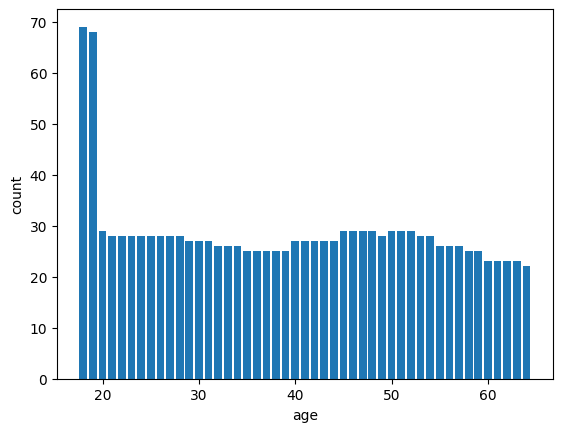

The below chart shows the frequency of ages grouped.


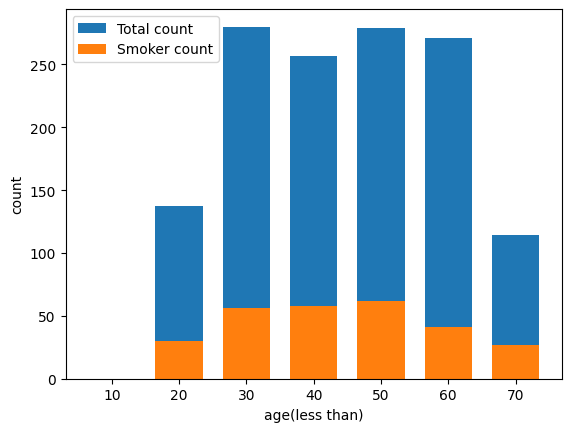

In [4]:
import matplotlib.pyplot as plt
import numpy as np

min_age = min(age_list)
max_age = max(age_list)
print("Min age is {} years and max age is {} years.".format(min_age, max_age))
print("Average age of patients in the dataset is {} years.".format(round(statistics.mean(age_list),2)))
print("Median age is {} years.".format(round(statistics.median(age_list),2)))
mode_age = statistics.mode(age_list)
print("Mode age is {} years with a count of {}.".format(mode_age,age_list.count(mode_age)))

# print("Standard deviation of ages: {}".format(round(statistics.pstdev(age_list),2)))
# print("IQR of ages: {}".format(round(np.quantile(age_list,0.75) - np.quantile(age_list,0.25),2)))

print("\nRefer to the chart below to see the frequency of all ages.")

all_ages = set(age_list)
ages_count = dict.fromkeys(all_ages,0)
for row in imported_data:
    ages_count[int(row['age'])] += 1

x = np.array(list(ages_count.keys()))
y = np.array(list(ages_count.values()))

plt.bar(x,y)
plt.xlabel("age")
plt.ylabel("count")
plt.show()

print("The below chart shows the frequency of ages grouped.")
groups_ages_list = list(range(min_age-(min_age%10),max_age+11,10))
groups_ages_dict = dict.fromkeys(groups_ages_list,0)
sm_age_wise_count_dict = dict.fromkeys(groups_ages_list,0)
for row in imported_data:
    age = int(row['age'])
    sm = row['smoker']
    for group in groups_ages_list:
        if age < group:
            groups_ages_dict[group] += 1
            if sm == 'yes':
                sm_age_wise_count_dict[group] += 1
            break

x = np.array(list(groups_ages_dict.keys()))
# x = np.array(["18-20","21-30","31-40","41-50","51-60","61-70"])
y = np.array(list(groups_ages_dict.values()))

plt.bar(x,y,width=7)
plt.xlabel("age(less than)")
plt.ylabel("count")

x = np.array(list(sm_age_wise_count_dict.keys()))
y = np.array(list(sm_age_wise_count_dict.values()))

plt.bar(x,y,width=7)

plt.legend(["Total count", "Smoker count"], loc=2)
plt.show()


---------------
On bmi..

Min bmi is 15.96 and Max bmi is 53.13
Average bmi is 30.66.
Median bmi is 30.4.


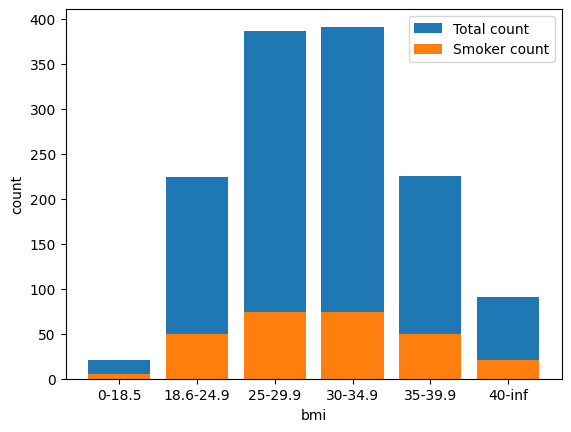

As we can see in the chart, majority of the patients are overweight or obese.
For each bmi group, what is the representation of each age group?
For group 0-18.5


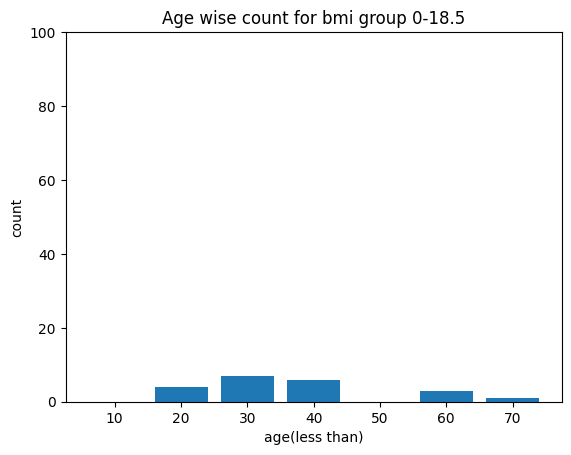

For group 18.6-24.9


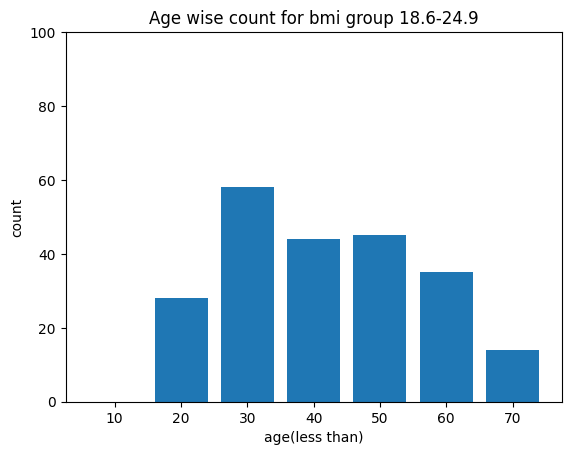

For group 25-29.9


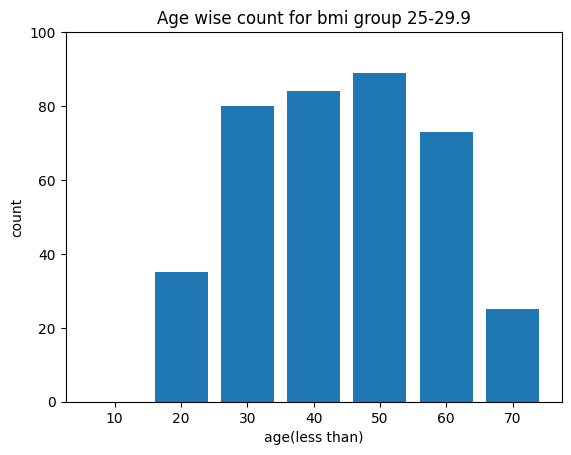

For group 30-34.9


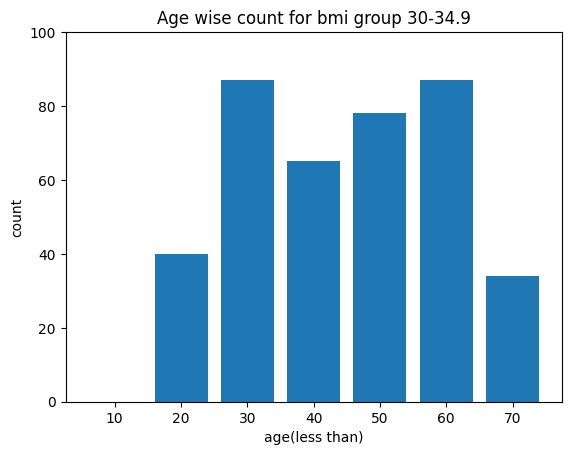

For group 35-39.9


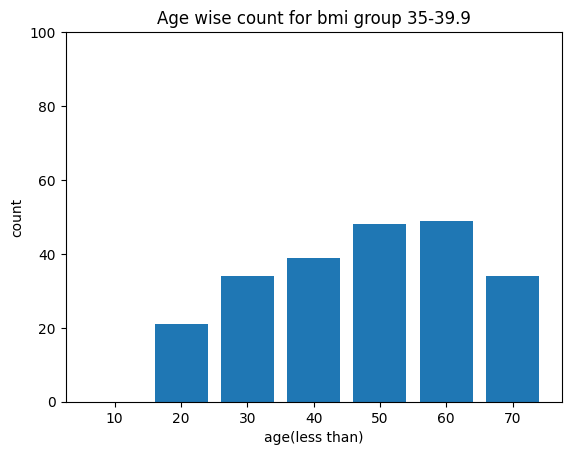

For group 40-inf


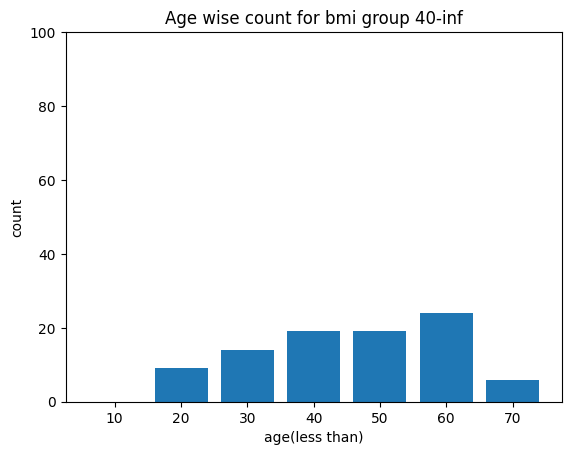

From the above charts we see that all age groups are represented in similar proportions for each bmi group.
Same as the all the ages chart.


In [5]:
	
# BMI Categories:
# Underweight = <18.5
# Normal weight = 18.5–24.9
# Overweight = 25–29.9
# Obesity = BMI of 30 or greater
import math

print("Min bmi is {} and Max bmi is {}".format(min(bmi_list), max(bmi_list)))
print("Average bmi is {}.".format(round(statistics.mean(bmi_list),2)))
print("Median bmi is {}.".format(round(statistics.median(bmi_list),2)))
# print("Standard deviation of bmi: {}".format(round(statistics.pstdev(bmi_list),2)))
# print("IQR of bmi: {}".format(round(np.quantile(bmi_list,0.75) - np.quantile(bmi_list,0.25),2)))

all_bmis = set(bmi_list)
groups_bmi_list = [0,18.6,25,30,35,40,math.inf]
groups_bmi_dict = {}
bmis_age_dict = {}
sm_bmi_wise_count_dict = {}

for i in range(len(groups_bmi_list)):
    if i == len(groups_bmi_list) -1:
        continue
    groups_bmi_dict["{}-{}".format(groups_bmi_list[i],groups_bmi_list[i+1]-0.1)] = 0
    bmis_age_dict.setdefault("{}-{}".format(groups_bmi_list[i],groups_bmi_list[i+1]-0.1),[])
    sm_bmi_wise_count_dict.setdefault("{}-{}".format(groups_bmi_list[i],groups_bmi_list[i+1]-0.1),0)

for row in imported_data:
    age = int(row['age'])
    bmi = float(row['bmi'])
    sm = row['smoker']

    for i in range(len(groups_bmi_list)):
        if bmi >= groups_bmi_list[i] and bmi < groups_bmi_list[i+1]:
            group = "{}-{}".format(groups_bmi_list[i],groups_bmi_list[i+1]-0.1)
            # groups_bmi_dict.setdefault("{}-{}".format(groups_bmi_list[i],groups_bmi_list[i+1]-0.1),0)
            groups_bmi_dict[group] += 1
            bmis_age_dict[group].append(age)
            if sm == 'yes':
                sm_bmi_wise_count_dict[group] += 1
            break

x = np.array(list(groups_bmi_dict.keys()))
y = np.array(list(groups_bmi_dict.values()))
plt.bar(x,y)

x = np.array(list(sm_bmi_wise_count_dict.keys()))
y = np.array(list(sm_bmi_wise_count_dict.values()))
plt.bar(x,y)


plt.xlabel("bmi")
plt.ylabel("count")
plt.legend(["Total count", "Smoker count"])
plt.show()

print("As we can see in the chart, majority of the patients are overweight or obese.")

print("For each bmi group, what is the representation of each age group?")
for bmi_group in bmis_age_dict:
    print("For group {}".format(bmi_group))
    t_set = set(bmis_age_dict[bmi_group])
    t_dict = dict.fromkeys(groups_ages_list,0)

    for age in bmis_age_dict[bmi_group]:
        for age_group in groups_ages_list:
            if age < age_group:
                t_dict[age_group] += 1
                break

    
    x = np.array(list(t_dict.keys()))
    y = np.array(list(t_dict.values()))
    plt.bar(x,y,width=8)

    plt.ylim(0,100)
    plt.xlabel("age(less than)")
    plt.ylabel("count")
    plt.title("Age wise count for bmi group {}".format(bmi_group))
    plt.show()
    
print("From the above charts we see that all age groups are represented in similar proportions for each bmi group.")
print("Same as the all the ages chart.")



In [11]:
# #find avg bmi for each age group.
# # ages_bmi_dict = dict.fromkeys(groups_ages_list)
# ages_bmi_dict = {}
# # bmis_age_dict = {}
# # print(ages_bmi_dict)
# # print(groups_ages_list)
# for row in imported_data:
#     age = int(row['age'])
#     bmi = float(row['bmi'])
#     for group in groups_ages_list:
#         if (age < group):
#             # print("group {}".format(group))
#             # print("age {}".format(age))
#             ages_bmi_dict.setdefault(group, []).append(bmi)
#             # ages_bmi_dict[group].append(bmi)
#             break
#     # for group in groups_bmi_list:
#     #     if (bmi < group)
# print(ages_bmi_dict)
# print(list(ages_bmi_dict.keys()))

# # for group in groups_ages_list:
# #     t_arr = []
# #     for row in imported_data:
# #         age = int(row['age'])
# #         bmi = float(row['bmi'])
# #         if age < group:
# #             t_arr.append(bmi)
# #     ages_bmi_dict[group] = t_arr

# for group in list(ages_bmi_dict.keys()):
#     # print(len(ages_bmi_dict[group]))
#     print("Avg bmi for ages less than {} is {}".format(group,round(statistics.mean(ages_bmi_dict[group]),2)))
#     print("median bmi for ages less than {} is {}".format(group,round(statistics.median(ages_bmi_dict[group]),2)))


# # print(len(ages_bmi_dict[20]))


---------------
On children count..

Average count of children: 1.09
Median count: 1.0
Mode count: 0
Average age of patients with children is 39.78 years.


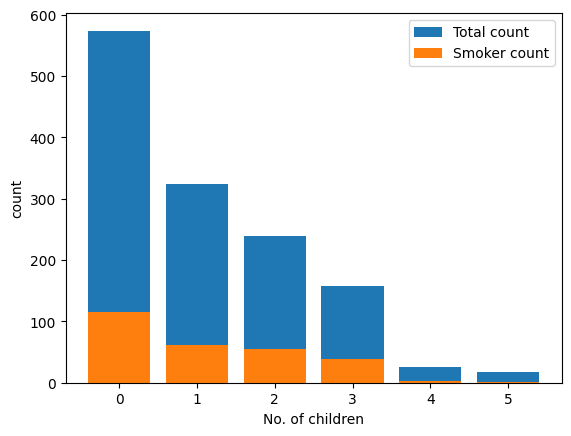

ANSWER THIS : Are patients with more number of children also more obese?


In [7]:
print("Average count of children: {}".format(round(statistics.mean(children_list),2)))
print("Median count: {}".format(round(statistics.median(children_list),2)))
print("Mode count: {}".format(round(statistics.mode(children_list),2)))

all_children = set(children_list)
children_count_dict = dict.fromkeys(all_children,0)
ages_list_children = []
ages_list_no_children = []
bmi_child5_list = []
sm_children_wise_count_dict = dict.fromkeys(all_children,0)
for row in imported_data:
    child_count = float(row['children'])
    sm = row['smoker']
    children_count_dict[child_count] += 1
    if sm == 'yes':
        sm_children_wise_count_dict[child_count] += 1

    if child_count >0:
        ages_list_children.append(int(row['age']))
    else:
        ages_list_no_children.append(int(row['age']))
        if child_count == 5:
            bmi_child5_list.append(int(row['bmi']))

print("Average age of patients with children is {} years.".format(round(statistics.mean(ages_list_children),2)))
# print("Average age of patients with no children is {} years.".format(round(statistics.mean(ages_list_no_children),2)))
x = np.array(list(children_count_dict.keys()))
y = np.array(list(children_count_dict.values()))
plt.bar(x,y)

x = np.array(list(sm_children_wise_count_dict.keys()))
y = np.array(list(sm_children_wise_count_dict.values()))
plt.bar(x,y)

plt.xlabel("No. of children")
plt.ylabel("count")
plt.legend(["Total count", "Smoker count"])
plt.show()

print("ANSWER THIS : Are patients with more number of children also more obese?")

# for bmi in bmi_child5_list:

---------------
On charges..

min charges: 1121.8739
max charges: 63770.42801
Average charges: 13270.42
Median charges: 9382.03
Mode charges: 1639.56


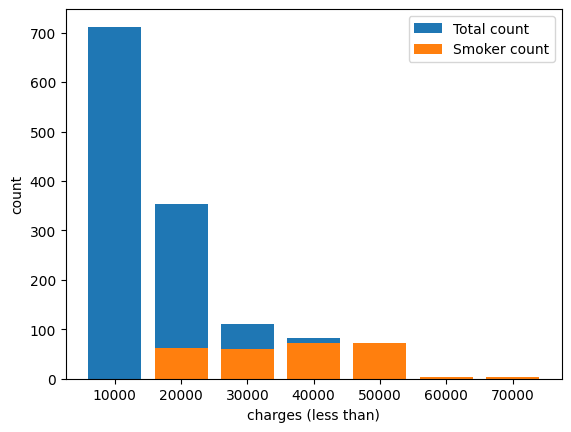

Standard deviation of charges: 12105.48
IQR of charges: 11899.63


In [8]:
print("min charges: {}".format(min(charges_list)))
print("max charges: {}".format(max(charges_list)))
print("Average charges: {}".format(round(statistics.mean(charges_list),2)))
print("Median charges: {}".format(round(statistics.median(charges_list),2)))
print("Mode charges: {}".format(round(statistics.mode(charges_list),2)))

# all_charges = set(charges_list)
groups_charges_list = list(range(10000,71000,10000))
groups_charges_dict = dict.fromkeys(groups_charges_list, 0)
sm_charges_wise_dict = dict.fromkeys(groups_charges_list, 0)

for row in imported_data:
    charge = float(row['charges'])
    sm = row['smoker']
    for group in groups_charges_list:
        if(charge < group):
            groups_charges_dict[group] += 1
            if sm == 'yes':
                sm_charges_wise_dict[group] += 1
            break

x = np.array(list(groups_charges_dict.keys()))
y = np.array(list(groups_charges_dict.values()))
plt.bar(x,y, width=8000)

x = np.array(list(sm_charges_wise_dict.keys()))
y = np.array(list(sm_charges_wise_dict.values()))
plt.bar(x,y, width=8000)

plt.xlabel("charges (less than)")
plt.ylabel("count")
plt.legend(["Total count", "Smoker count"])
plt.show()

print("Standard deviation of charges: {}".format(round(statistics.pstdev(charges_list),2)))
print("IQR of charges: {}".format(round(np.quantile(charges_list,0.75) - np.quantile(charges_list,0.25),2)))

difference in charges between smokers and non-smokers.

In [9]:
charges_list_smoker = []
ages_list_smoker = []
charges_list_non_smoker = []
ages_list_non_smoker = []
children_list_smoker = []
children_list_non_smoker = []
bmi_list_smoker = []
bmi_list_non_smoker = []
for row in imported_data:
    if row['smoker'] == 'yes':
        charges_list_smoker.append(float(row['charges']))
        children_list_smoker.append(int(row['children']))
        ages_list_smoker.append(int(row['age']))
        bmi_list_smoker.append(float(row['bmi']))
    else:
        charges_list_non_smoker.append(float(row['charges']))
        children_list_non_smoker.append(int(row['children']))
        ages_list_non_smoker.append(int(row['age']))
        bmi_list_non_smoker.append(float(row['bmi']))

print("Average charges of smokers is {}.".format(round(statistics.mean(charges_list_smoker),2)))
print("Average charges of non-smokers is {}.".format(round(statistics.mean(charges_list_non_smoker),2)))

Average charges of smokers is 32050.23.
Average charges of non-smokers is 8434.27.


Scatter plots
1. x axis = charges, y axis = children, values = smoker
2. x axis = charges, y axis = age, values = smoker
3. x axis = charges, y axis = bmi, values = smoker
4. x axis = region, y axis = age, values = smoker

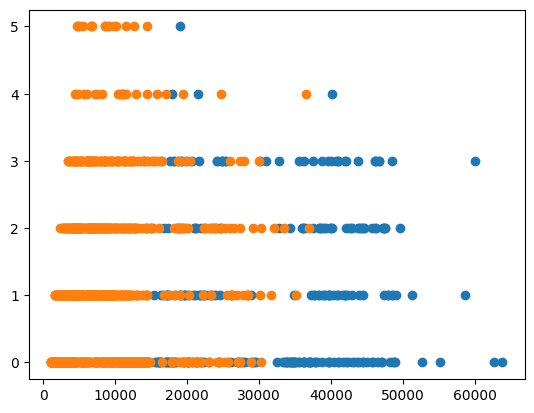

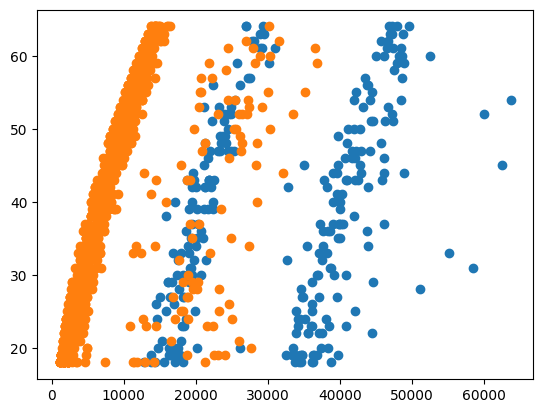

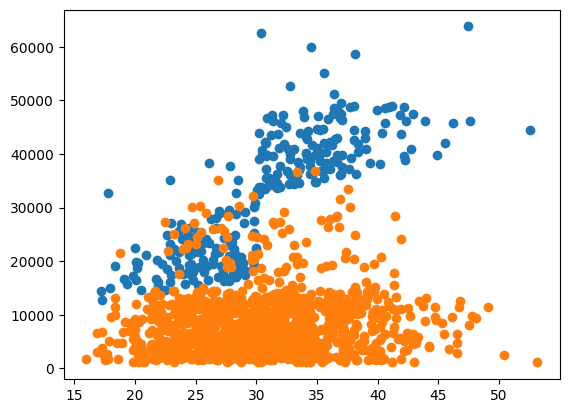

In [10]:
x = np.array(charges_list_smoker)
y = np.array(children_list_smoker)
plt.scatter(x,y)

x = np.array(charges_list_non_smoker)
y = np.array(children_list_non_smoker)
plt.scatter(x,y)

plt.show()

x = np.array(charges_list_smoker)
y = np.array(ages_list_smoker)
plt.scatter(x,y)

x = np.array(charges_list_non_smoker)
y = np.array(ages_list_non_smoker)
plt.scatter(x,y)

plt.show()

x = np.array(charges_list_smoker)
y = np.array(bmi_list_smoker)
plt.scatter(y,x)

x = np.array(charges_list_non_smoker)
y = np.array(bmi_list_non_smoker)
plt.scatter(y,x)

plt.show()

# for region in all_regions:
#     x = np.array(list(all_regions))
#     y = np.array(region_smoker_list[region])
#     plt.scatter(x, y)

# plt.show()